In [25]:
from shapes import Triangle, Shape
from hexshapes import Hexagon, HShape
from shapes import hexagon_maker as hexmaker
from shapes import triangle_of_hexes as toh
from hexshapes import bighex_maker as bhmaker
import time

def data_writer(base, type = "corona"):
    with open('./plotlist.txt', 'w') as file:
        if type == "heesch":
            coronalist = base.heesch_computer()[0]
            coronadata = []
            for corona_config in coronalist:
                coronadata.append([shape.to_data() for shape in corona_config])
            datadict = {"type": type, "num": len(coronalist), "data": {"base": base.to_data(), "heesch": coronadata}}

        elif type == "corona2":
            coronalist = base.second_corona()[0]
            first_data = []
            for shape in coronalist["first"]:
                first_data.append(shape.to_data())
            second_data = []
            for shape in coronalist["second"][0]:
                second_data.append(shape.to_data())
            datadict = {"type": type, "data": {"base": base.to_data(), "first": first_data, "second": second_data}}

        elif type == "corona":
            coronalist = base.corona_maker(base.orientations())[0]
            corona_data = []
            for shape in coronalist:
                corona_data.append(shape.to_data())
            datadict = {"type": type, "data": {"base": base.to_data(), "corona": corona_data}}

        elif type == "base":
            datadict = {"type": type, "data": {"base": base.to_data()}}

        file.write(str(datadict))

start_time = time.time()

""" Some testing shapes"""
# S1 = Shape(toh())
# S1 = Shape(toh() + hexmaker(2,-5) + hexmaker(5, -2) + hexmaker(6, -3))
# S1 = Shape([triangle for triangle in toh() if triangle not in hexmaker(3,-3)+hexmaker(2,-2)])
# S1 = Shape([triangle for triangle in hexmaker(0,0)+[Triangle(1,1)] if triangle not in [Triangle(0,0)]])
# S1 = Shape(hexmaker(-1,1)+hexmaker(1,2)+hexmaker(2,1)+hexmaker(1,-1)+hexmaker(-1,-2))


""" edge data testing """
# S1 = HShape([Hexagon(0,0, [1, 1, 1, 0, -1, -1])])

"""4hex H2
takes too long"""

# priority = [
# Hexagon(-1, 1),
# Hexagon(1, 2),
# ]
#
# S1 = HShape([
# Hexagon(0, 0, [0, 0, 0, 1, -1, 0]),
# Hexagon(1, -1),
# Hexagon(2, 1),
# Hexagon(3, 0),
# ],
# priority = priority
# )

"""3hex H2
computes in 13 sec"""

# S1 = HShape(
# [Hexagon(0, 0, [0, 0, 0, -1, 0, -1]),
# Hexagon(2, 1, [0, 0, 1, 0, 0, 0]),
# Hexagon(1, -1)],
#
# )

""" 2-hexapillar
computes in 323 sec"""
# S1 = HShape(
# [Hexagon(0, 0, [1, 1, 0, -1, -1, 0]),
# Hexagon(2, 1, [1, 1, -1, -1, -1, 0])],

# )

# H1 = Hexagon(0, 0, [1, 0, 0, 0, 0, 0])
# H2 = Hexagon(1, 2, [0, 0, -1, 0, 0, 0])
# S1 = HShape([H1, H2])

# S1 = HShape([
# Hexagon(0, 0, [0, 0, 0, 0, -1, 0]),
# Hexagon(1, -1, [0, 0, 0, 0, 0, 1]),
# Hexagon(2, 1),
# Hexagon(3, 0),
# Hexagon(0, -3),
# ])

""" hexagon testing """
# S1 = HShape( [Hexagon(0,0), Hexagon(2,1), Hexagon(3,0)])
# S1 = HShape( [hex for hex in bhmaker(0,0) if hex not in [Hexagon(-2,-1), Hexagon(0,0)] ]  )
S1 = HShape( bhmaker(0,0)+[Hexagon(-2,2), Hexagon(-2,-4), Hexagon(4,2), Hexagon(0,-3), Hexagon(3,0), Hexagon(4,-1)] )


""" This has types:
    1) Corona
    2) Boundary
    3) Base
"""
data_writer(S1, type = "heesch")
print("--- %s seconds ---" % (time.time() - start_time))


 we are now at 5% 
24
 we are now at 10% 
235
 we are now at 15% 
5440
 we are now at 20% 
17386
 we are now at 25% 
10448
 we are now at 30% 
11881
 we are now at 35% 
6520
 we are now at 40% 
15516
 we are now at 45% 
15683
 we are now at 50% 
12996
 we are now at 55% 
43549
 we are now at 60% 
26623
 we are now at 65% 
18697
 we are now at 70% 
65044
 we are now at 75% 
62233
 we are now at 80% 
49129
 we are now at 85% 
35185
 we are now at 90% 
48206
 we are now at 95% 
42403
 we are now at 100% 
32763

                --------------------------------------
                We are now computing the 2nd corona
                --------------------------------------
                
 we are now at 0% 
 we are now at 1% 
20
 we are now at 3% 
24
 we are now at 5% 
10
 we are now at 6% 
51
 we are now at 8% 
204
 we are now at 10% 
199
 we are now at 11% 
187
 we are now at 13% 
41
 we are now at 15% 
451
 we are now at 16% 
 we are now at 0% 
 we are now at 1% 
20
 we are now at 3% 
24

KeyboardInterrupt: 

C:\Users\tk\AppData\Local\Temp\ipykernel_15448\864680006.py:16: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  hexagon = RegularPolygon(parametrization(hex.origin),


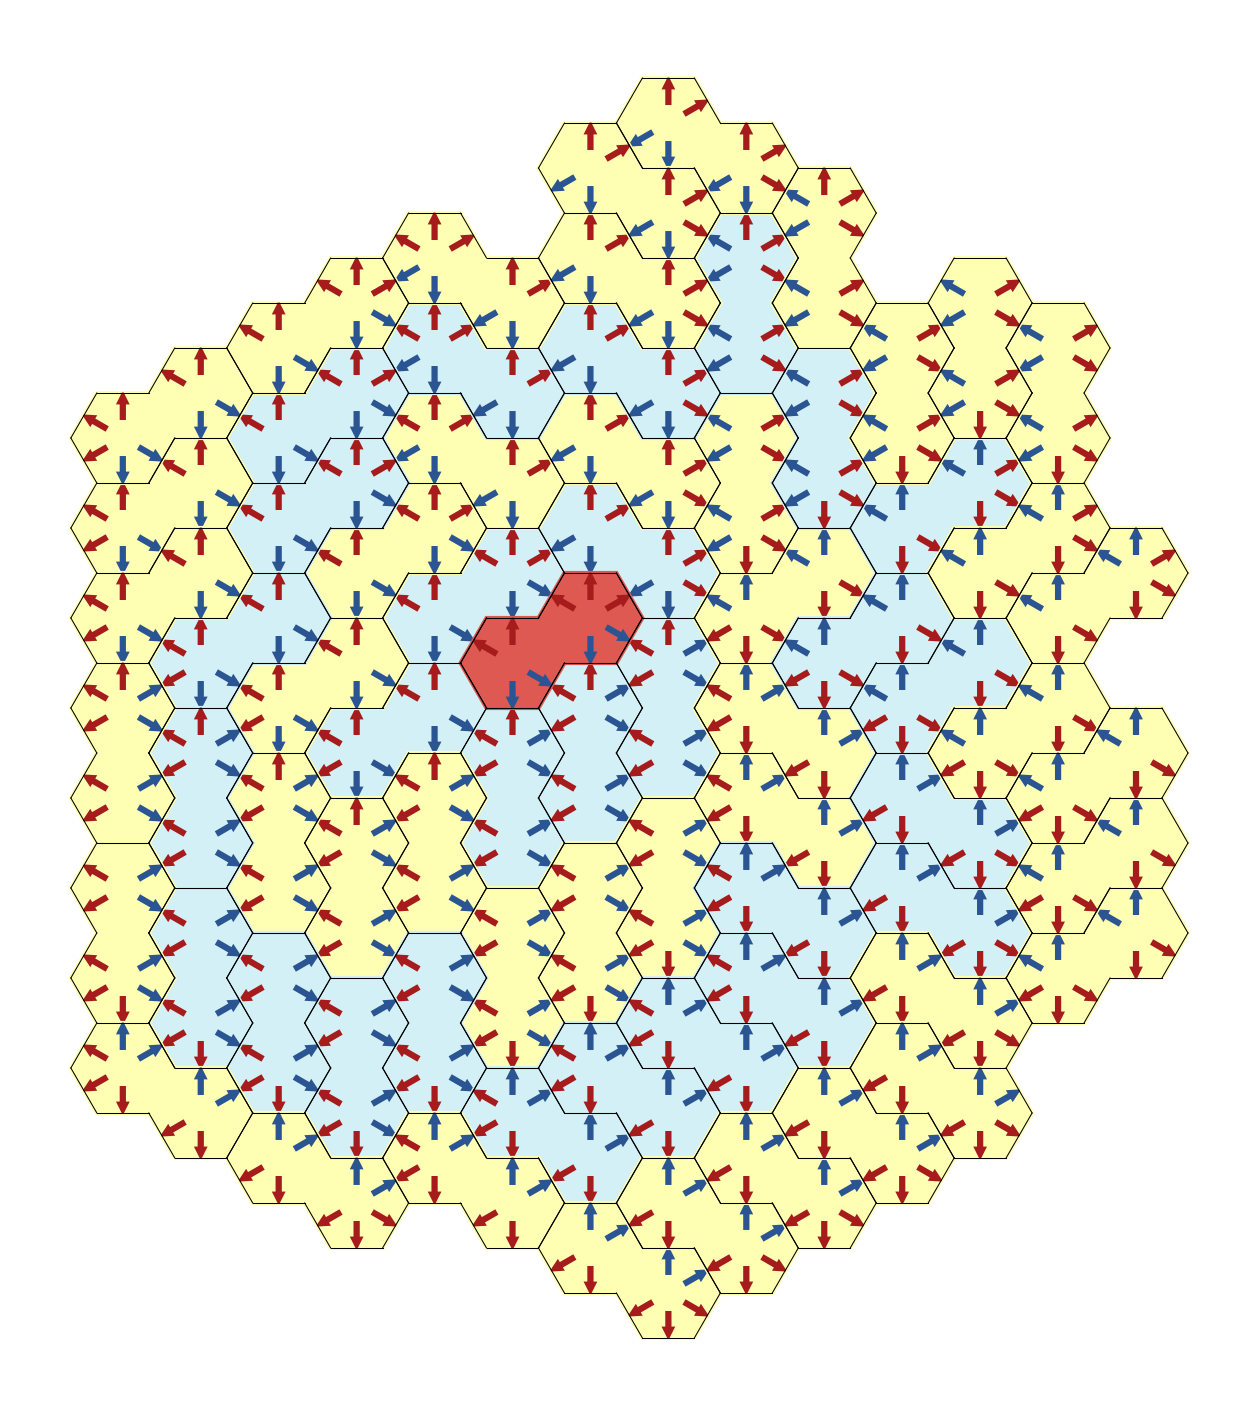

In [22]:
from hexshapes import Hexagon, HShape
import ast
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Circle

import numpy as np

def parametrization(el):
    xcoord = el[0]-0.5 * el[1]
    ycoord = 0.5*np.sqrt(3)*el[1]
    return (xcoord, ycoord)

def shapedrawer(shape, axes, color):
    for hex in shape.hexes:
        # 增加六边形边框宽度和颜色
        hexagon = RegularPolygon(parametrization(hex.origin), 
                                numVertices=6, 
                                orientation = 1/6 *np.pi,
                                radius= 1, 
                                alpha=1, 
                                color=color,
                                linewidth=2.0,  # 增加边框宽度
                                edgecolor='black')
        axes.add_patch(hexagon)
        edgedata = hex.edgedata
        for i in range(len(edgedata)):
            if edgedata[i] == 1:
                coord = parametrization(hex.origin)
                coord = (coord[0]+2/3*np.cos(i*1/6*2*np.pi-1/2*np.pi), coord[1]+2/3*np.sin(i*1/6*2*np.pi-1/2*np.pi))
                dx = 0.3 * np.cos(i*1/6*2*np.pi-1/2*np.pi)  # 增大箭头长度
                dy = 0.3 * np.sin(i*1/6*2*np.pi-1/2*np.pi)
                axes.arrow(coord[0]-dx, coord[1]-dy, dx, dy, 
                         head_width=0.2,  # 增大箭头宽度
                         head_length=0.2,
                         width=0.08,  # 增加箭身宽度
                         fc='#2b5592',  # 使用更深的蓝色
                         ec='#2b5592')
            elif edgedata[i] == -1:
                coord = parametrization(hex.origin)
                coord = (coord[0]+2/3*np.cos(i*1/6*2*np.pi-1/2*np.pi), coord[1]+2/3*np.sin(i*1/6*2*np.pi-1/2*np.pi))
                dx = 0.3 * np.cos(i*1/6*2*np.pi-1/2*np.pi)
                dy = 0.3 * np.sin(i*1/6*2*np.pi-1/2*np.pi)
                axes.arrow(coord[0]-dx, coord[1]-dy, dx, dy,
                         head_width=0.2,
                         head_length=0.2, 
                         width=0.08,
                         fc='#a61b1b',  # 使用更深的红色
                         ec='#a61b1b')

with open('./plotlist.txt', 'r') as text:
    data = ast.literal_eval(text.readline())

# 设置更大的图形尺寸和DPI
plt.figure(figsize=(12, 12), dpi=150)
axs = plt.subplot()

plottinglist = []
if data["type"] == "base":
    base = HShape( [Hexagon(*elem) for elem in data["data"]["base"]])
    shapedrawer(base, axs, "#f0e6ff")  # 使用更鲜艳的紫色
    plottinglist.extend(base.plot_data("black"))

elif data["type"] == "corona":
    config = data["data"]["corona"]
    for pre_shape in config:
        shape = HShape( [Hexagon(*elem) for elem in pre_shape] )
        shapedrawer(shape, axs, "#e6e6e6")  # 使用更清晰的灰色
        plottinglist.extend(shape.plot_data("k"))
    base = HShape( [Hexagon(*elem) for elem in data["data"]["base"]])
    shapedrawer(base, axs, "#e6e6e6")
    plottinglist.extend(base.plot_data("k"))

elif data["type"] == "heesch":
    heesch_data = data["data"]["heesch"]
    for index in range(len(heesch_data)):
        corona = heesch_data[index]
        for pre_shape in corona:
            shape = HShape( [Hexagon(*elem) for elem in pre_shape] )
            color = "#d4f0f7" if index%2 == 0 else "#ffffb3"  # 使用更鲜艳的颜色
            shapedrawer(shape, axs, color)
            plottinglist.extend(shape.plot_data("k"))

    base = HShape( [Hexagon(*elem) for elem in data["data"]["base"]])
    shapedrawer(base, axs, "#de5952")
    plottinglist.extend(base.plot_data("k"))

elif data["type"] == "corona2":
    first = data["data"]["first"]
    for pre_shape in first:
        shape = HShape( [Hexagon(*elem) for elem in pre_shape] )
        shapedrawer(shape, axs, "#ffffff")
        plottinglist.extend(shape.plot_data("k"))

    second = data["data"]["second"]
    for pre_shape in second:
        shape = HShape( [Hexagon(*elem) for elem in pre_shape] )
        shapedrawer(shape, axs, "#cccccc")  # 使用更清晰的灰色
        plottinglist.extend(shape.plot_data("k"))

    base = HShape( [Hexagon(*elem) for elem in data["data"]["base"]])
    shapedrawer(base, axs, "#404040")  # 使用更深的黑色
    plottinglist.extend(base.plot_data("k"))

axs.plot(*(plottinglist), linewidth=0.5)  # 增加线条宽度
plt.autoscale(enable = True)
axs.set_aspect("equal")
plt.axis('off')
plt.show()